In [33]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import pylab as pl
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [34]:
crime = "NewBostonCrime.csv"
names = ['DISTRICT', 'HOUR', 'YEAR']
dataset = pd.read_csv(crime, usecols=names, nrows = 70000)
df = pd.DataFrame(dataset)



In [35]:
#df = df[df.Lat != -1]
#df = df[df.Long != -1]
#df = df[df.Lat != 0]
#df = df[df.Long != 0]

In [36]:
greaterThan2014 = df[df['YEAR']>2014]
df = greaterThan2014[greaterThan2014['YEAR']<2019]

In [37]:
df = df.drop(['YEAR'], axis = 1)

In [38]:
df = df.dropna()

In [39]:

df.fillna(0, inplace=True)

def handle_non_numerical_data(df):
    columns = df.columns.values
    
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1

            df[column] = list(map(convert_to_int, df[column]))
            
    return df

df = handle_non_numerical_data(df)
#print(df.head())

In [40]:
X = df.iloc[:, 0].values.reshape(-1, 1)
Y = df.iloc[:, 1].values.reshape(-1, 1) 
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)

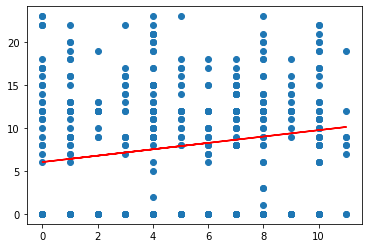

In [41]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()